<a href="https://colab.research.google.com/github/ValdazoAmerico/Keras-Tensorflow-MultipleLinearRegression/blob/main/keras_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.__version__

'1.1.5'

In [2]:
df = pd.read_csv('MultipleLinear.csv')

In [3]:
df.columns

Index(['y', 'x1', 'x2'], dtype='object')

In [4]:
dataset = df.values

In [5]:
dataset

array([[  16.68,    7.  ,  560.  ],
       [  11.5 ,    3.  ,  220.  ],
       [  12.03,    3.  ,  340.  ],
       [  14.88,    4.  ,   80.  ],
       [  13.75,    6.  ,  150.  ],
       [  18.11,    7.  ,  330.  ],
       [   8.  ,    2.  ,  110.  ],
       [  17.83,    7.  ,  210.  ],
       [  79.24,   30.  , 1460.  ],
       [  21.5 ,    5.  ,  605.  ],
       [  40.33,   16.  ,  688.  ],
       [  21.  ,   10.  ,  215.  ],
       [  13.5 ,    4.  ,  255.  ],
       [  19.75,    6.  ,  462.  ],
       [  24.  ,    9.  ,  448.  ],
       [  29.  ,   10.  ,  776.  ],
       [  15.35,    6.  ,  200.  ],
       [  19.  ,    7.  ,  132.  ],
       [   9.5 ,    3.  ,   36.  ],
       [  35.1 ,   17.  ,  770.  ],
       [  17.9 ,   10.  ,  140.  ],
       [  52.32,   26.  ,  810.  ],
       [  18.75,    9.  ,  450.  ],
       [  19.83,    8.  ,  635.  ],
       [  10.75,    4.  ,  150.  ]])

In [16]:
# Separar los valores en X,Y
X = dataset[:, 1:3]
Y  = dataset[:,0]

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.6.0


In [19]:
def build_model():
  model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[2]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae','mse'])
  return model

In [20]:
model = build_model()

In [9]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-zf8wwnut
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-zf8wwnut


In [10]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [27]:
EPOCHS = 1000
history = model.fit(X, Y, epochs=EPOCHS, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:9.8509,  mae:2.2602,  mse:9.8509,  
....................................................................................................
Epoch: 100, loss:8.1643,  mae:2.1465,  mse:8.1643,  
....................................................................................................
Epoch: 200, loss:7.1833,  mae:1.9684,  mse:7.1833,  
....................................................................................................
Epoch: 300, loss:7.1745,  mae:2.1040,  mse:7.1745,  
....................................................................................................
Epoch: 400, loss:6.5584,  mae:1.9474,  mse:6.5584,  
....................................................................................................
Epoch: 500, loss:12.1293,  mae:2.9957,  mse:12.1293,  
....................................................................................................
Epoch: 600, loss:8.0190,  mae:2.0940,  mse:8.0190,  
......................

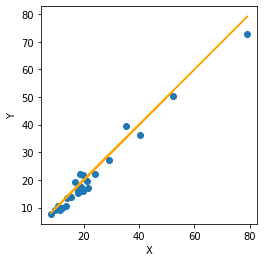

In [28]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect='equal')
plt.scatter(Y, test_predictions)
plt.xlabel('X')
plt.ylabel('Y')
_=plt.plot(Y,Y,color='orange')

In [29]:
import numpy as np
model.predict(np.array([[2,110]]))

array([[7.682521]], dtype=float32)